In [16]:
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA 
%matplotlib inline

[dataset](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)

In [3]:
data = pd.read_csv("wholesale_customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [25]:
# Display the data
# data.describe()
data.shape

(440, 6)

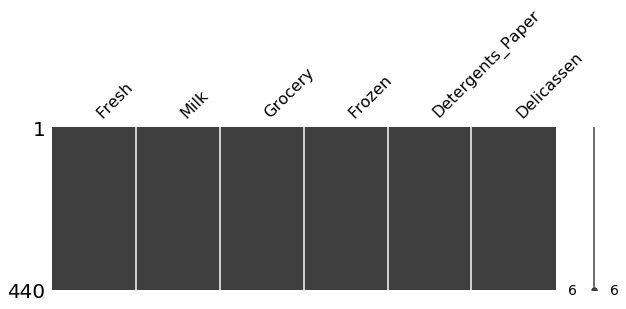

In [6]:
# Missing data detection
msno.matrix(data,figsize=(10,3));

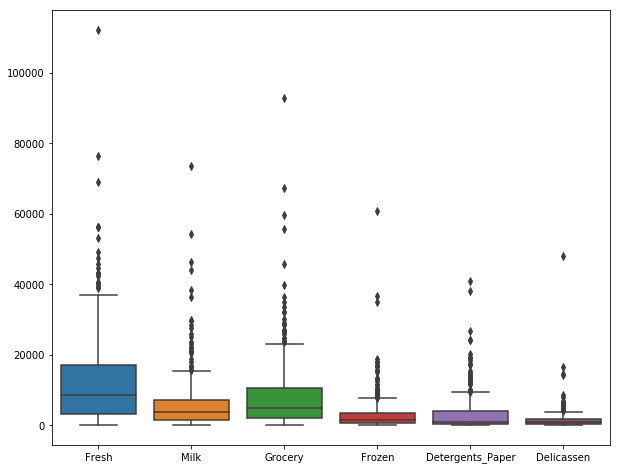

In [10]:
# Data distribution
plt.figure(figsize=(10,8))
sn.boxplot(data=data, orient="v");

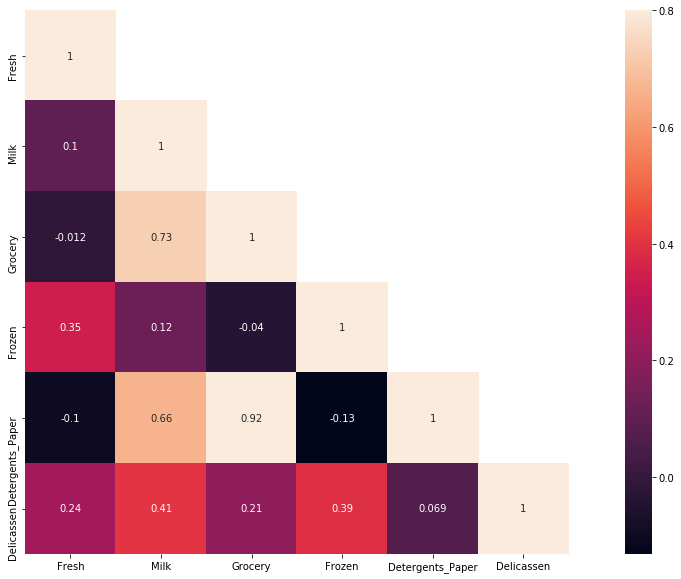

In [12]:
# Correlation analasys
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True);

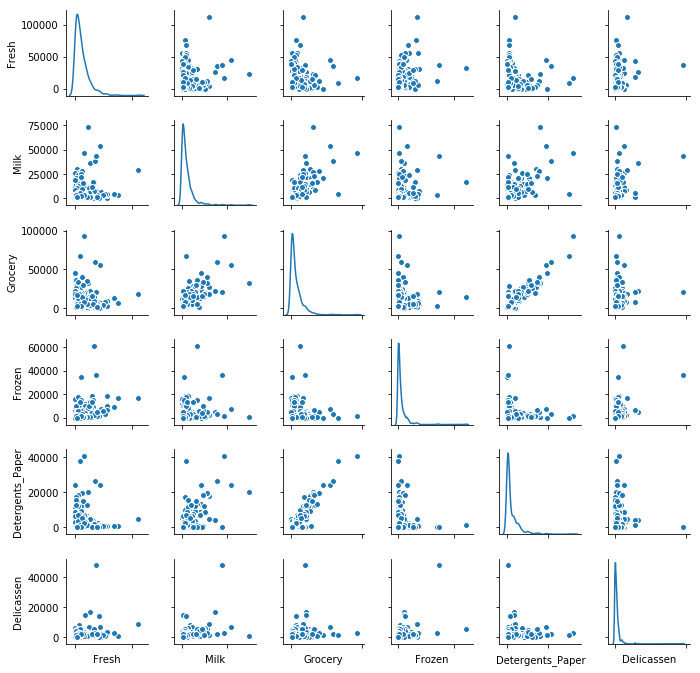

In [14]:
# Scatterplot
mx_plot = sn.pairplot(data, diag_kind="kde", size=1.6)
mx_plot.set(xticklabels=[]);

In [17]:
X = data.drop(["Grocery"], axis = 1)

In [18]:
# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

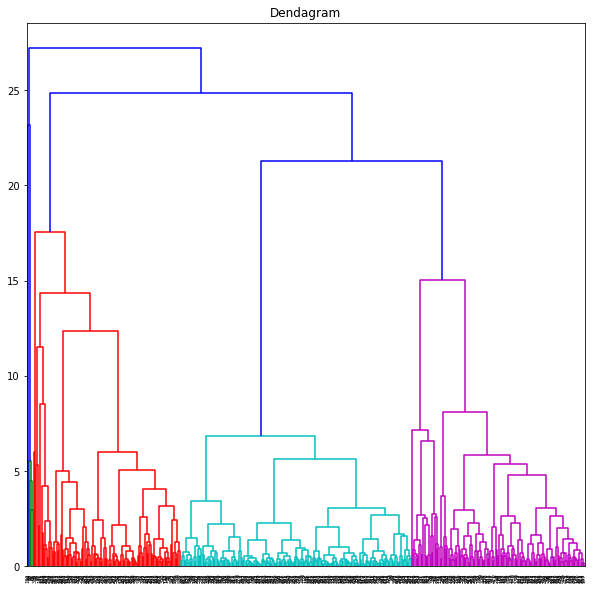

In [21]:
# Create dendragram
plt.figure(figsize=(10,10))
dendagram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendagram")
plt.show()

In [22]:
# Creating model
model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_out = model.fit_predict(X)

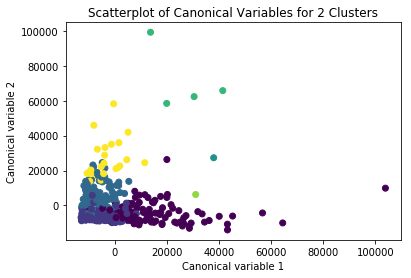

In [24]:
pca_2 = PCA(2) # Two Canonical Variables
plot_columns = pca_2.fit_transform(data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()